In [1]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.2 MB/s eta 0:00:00a 0:00:01


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import io
import xml.etree.ElementTree as ET
from tqdm import tqdm



In [2]:
import os

folder_path = '/srv/storage/idmctal@storage1.nancy.grid5000.fr/2023/m2/adrelingyte/data_mining/blogs'

pattern = re.compile(r'(\d+)\.(\w+)\.(\d+)\.(\w+)\.(\w+)')

data = []
unicode_errors_list = []
parsing_errors_list = []

def replace_ampersand(text):
    # Replace & with &amp; if it's not already in the &amp; format
    return re.sub(r'&(?!amp;)', '&amp;', text)

file_list = [file for file in os.listdir(folder_path) if re.match(pattern, file)]

for file_name in tqdm(file_list, desc="Processing XML files"):

  match = re.match(pattern, file_name)

  try:
    number, gender, age, genre, zodiac = match.groups()
    xml_file_path = os.path.join(folder_path, file_name)
    with open(xml_file_path, 'r', encoding='utf-8') as file:
      xml_content = file.read()

    # Replace & with &amp; where necessary
    modified_xml_content = replace_ampersand(xml_content)
    tree = ET.ElementTree(ET.fromstring(modified_xml_content))
    root = tree.getroot()

    dates = [date.text for date in root.findall(".//date")]
    posts = [post.text for post in root.findall(".//post")]


    for date, post in zip(dates, posts):
        data.append({
          "Number": number,
          "Gender": gender,
          "Age": age,
          "Post Genre": genre,
          "Zodiac Sign": zodiac,
          "Date": date,
          "Post": post
        })

  except ET.ParseError:
      parsing_errors_list.append(xml_file_path)
      continue
  except UnicodeDecodeError as decode_error:
      unicode_errors_list.append(xml_file_path)
      continue






Processing XML files:   1%|          | 160/18266 [00:00<00:45, 398.68it/s]

Processing XML files: 100%|██████████| 18266/18266 [00:43<00:00, 424.27it/s] 


In [3]:
df = pd.DataFrame(data)
df

,Number,Gender,Age,Post Genre,Zodiac Sign,Date,Post
0,3445511,female,26,Education,Libra,"29,May,2004",\n\n\t \n On Friday C and I were listenin...
1,3445511,female,26,Education,Libra,"27,May,2004",\n\n\t \n I love the mind of a five year ...
2,3445511,female,26,Education,Libra,"26,May,2004","\n\n\t \n Yes, it's true....corruption is..."
3,3445511,female,26,Education,Libra,"26,May,2004",\n\n\t \n Much to my surprise....Josh now...
4,3445511,female,26,Education,Libra,"25,May,2004",\n\n\t \n urlLink The spinning wool m...
...,...,...,...,...,...,...,...
453814,3561869,female,17,indUnk,Sagittarius,"13,August,2004","\n\n \n Oh Mandy Moore. Speaking of, ..."
453815,3561869,female,17,indUnk,Sagittarius,"10,August,2004",\n\n \n I woke up this morning to hel...
453816,3561869,female,17,indUnk,Sagittarius,"09,August,2004",\n\n \n There is a game commonly know...
453817,3561869,female,17,indUnk,Sagittarius,"08,August,2004",\n\n \n I'm back from Junior Miss! YA...


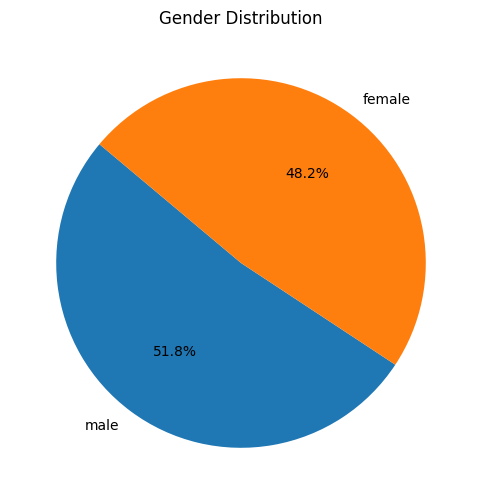

In [90]:

# Count the number of occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()


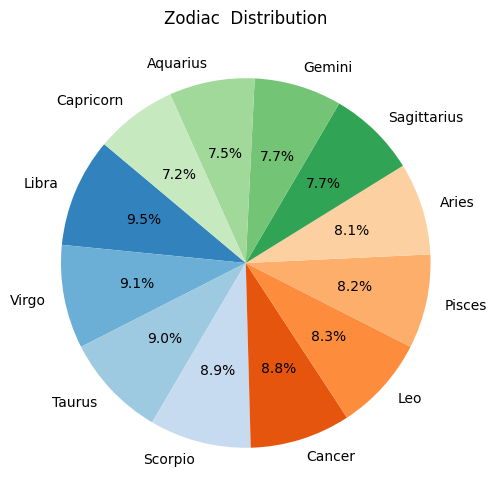

In [91]:
# Count the number of occurrences of each gender
zodiac_counts = df['Zodiac Sign'].value_counts()

labels=zodiac_counts.index

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(zodiac_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab20c'))


plt.title('Zodiac  Distribution')
plt.show()

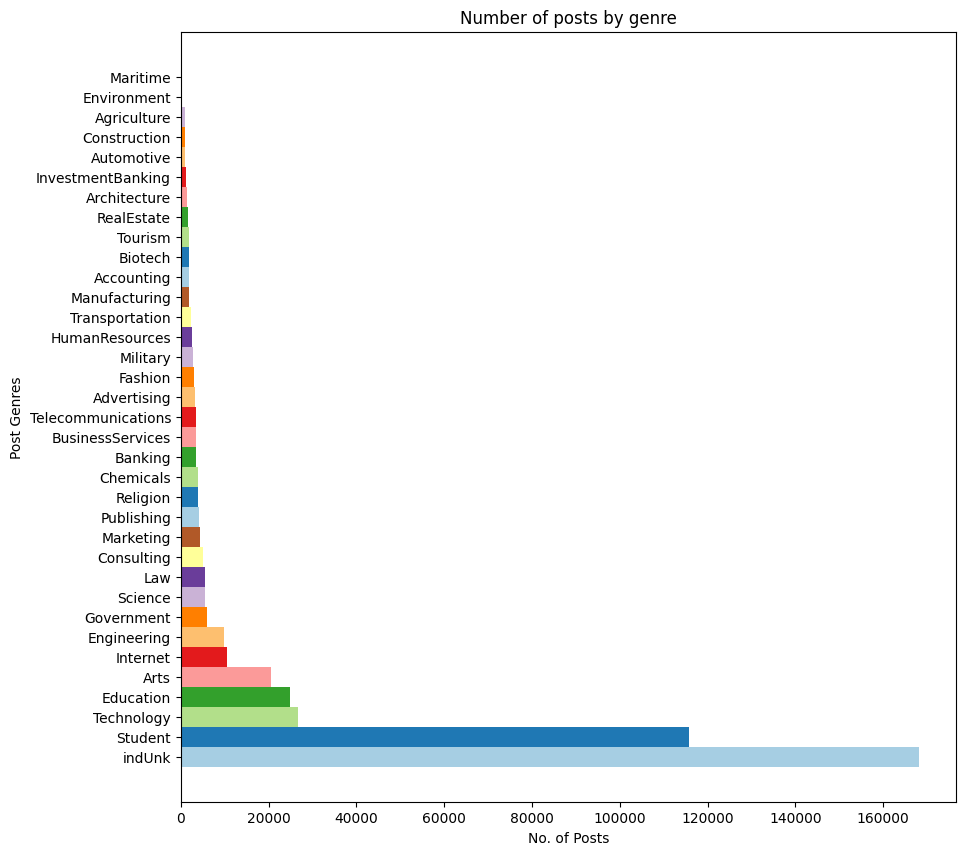

In [92]:
fig = plt.figure(figsize=(10, 10))

post_counts = df['Post Genre'].value_counts()

labels = post_counts.index
# Creating the horizontal bar plot
plt.barh(labels, post_counts, color=sns.color_palette("Paired"), height=1)

plt.ylabel("Post Genres")
plt.xlabel("No. of Posts")
plt.title("Number of posts by genre")
plt.show()


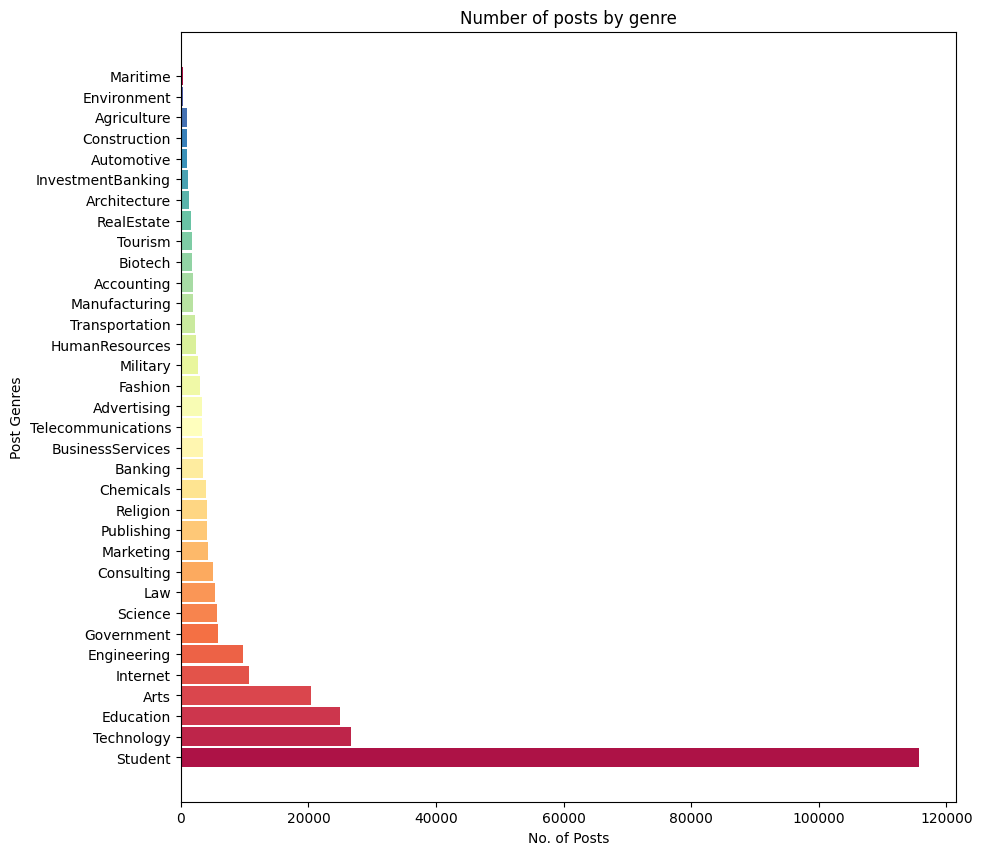

In [93]:
# Find the label with the second-highest count
label_to_remove = df['Post Genre'].value_counts().nlargest(2).idxmax()
# Remove the label with the second-highest count
df=df[df["Post Genre"] != label_to_remove]



fig = plt.figure(figsize=(10, 10))

post_counts = df['Post Genre'].value_counts()
labels = post_counts.index

custom_palette = sns.color_palette("Spectral", n_colors=33)
# Creating the horizontal bar plot
plt.barh(labels, post_counts, color=custom_palette, height=0.9)

plt.ylabel("Post Genres")
plt.xlabel("No. of Posts")
plt.title("Number of posts by genre")
plt.show()


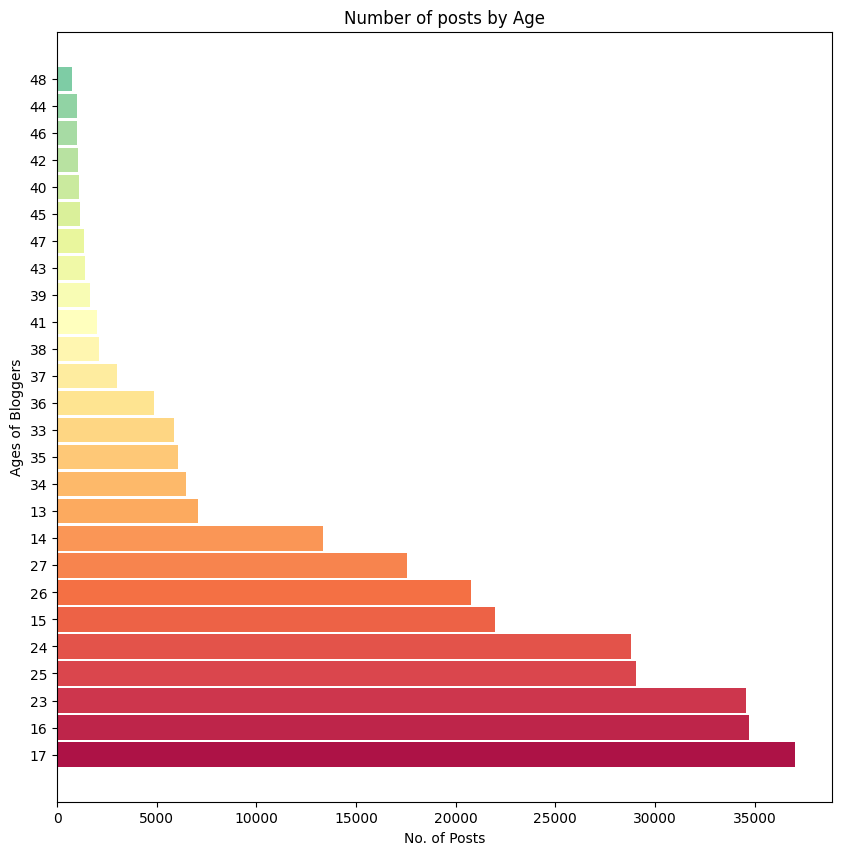

In [95]:
fig = plt.figure(figsize=(10, 10))

age_counts = df['Age'].value_counts()
labels = age_counts.index

custom_palette = sns.color_palette("Spectral", n_colors=33)
# Creating the horizontal bar plot
plt.barh(labels, age_counts, color=custom_palette, height=0.9)

plt.ylabel("Ages of Bloggers")
plt.xlabel("No. of Posts")
plt.title("Number of posts by Age")
plt.show()

In [4]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = []
    for text in texts:
        lower = text.lower() 
        no_punctuation = NON_ALPHANUM.sub(r' ', lower)
        no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
        normalized_texts.append(no_non_ascii)
    return normalized_texts



# Assuming you have a DataFrame named 'df' and a column named 'Post'
df['Post'].apply(normalize_texts)

df
#data_texts = normalize_texts(df["Post"])

0         \n\n\t \n      On Friday C and I were listenin...
1         \n\n\t \n      I love the mind of a five year ...
2         \n\n\t \n      Yes, it's true....corruption is...
3         \n\n\t \n      Much to my surprise....Josh now...
4         \n\n\t \n       urlLink    The spinning wool m...
                                ...                        
453814    \n\n     \n      Oh Mandy Moore. Speaking of, ...
453815    \n\n     \n      I woke up this morning to hel...
453816    \n\n     \n      There is a game commonly know...
453817    \n\n     \n      I'm back from Junior Miss! YA...
453818    \n\n     \n      I'm about to leave for a week...
Name: Post, Length: 453819, dtype: object


: 